# Wstęp teoretyczny

Na wykładzie zaczeliśmy temat tabel przestawnych ale przed tym omówilismy sposoby łączenia ramek. 

jednym z nich jest funkcja ```pd.concat()```, gdzie po prostu przyłączane są ramki. Można w tej funkcji wyszczególnic czy chcemy łączyć ramki do kolumn czy do wierszy. Kolejno zapisuje się to w ten sposób ```pd.concat(df1,df2,axis = 1(albo 0))```.  

Istnieje również funkcja ```pd.merge()```, która nam posłużyła do rozszyfrowywania danych ukrytych pod cyferkami lub pod literkami. Kolumna szyfrowana musi byc taka sama jak kolumna dekodująca i musi mieć tyle samo wierszy.
  
 
Sam proces polega na tym że mamy 2 ramki gdzie jest nasza kolumna zakodowana i ramka druga gdzie mamy nazwe tej kolumny i odpowadające jej rozszyfrowane kody. Po wywołaniu tej funkcji przypisywane są do ramki wartości tych kodów jako nowa kolumna.  

Tabele przestawne umozliwiają zbiorcze porównanie zagregowanych wartości w podgrupachdanych ( ́srednia, minimim, maksimum, suma...).
Do stworzenia tabeli przestawnej potrzeba nam funkcji pd.pivot_table:
``` python
    pac_data.pivot_table("zagregowane dane", index = "zmienna grupująca 1, columns='zmienna grupująca 2'))
```
Taka stworzona tabela przestawna domyślnie pokazuje warości średnie zagregowanych danych. Można ją zmodyfikować przez pole aggfunc.  

Również poznaliśmy tabele krzyżową ```pd.crosstab```, w której możemy porównywac liczebności różnych instancji.
``` python
    pd.crossyab(df['A'],df["B"])
    ```


#  Zadanie 1

In [1]:
import numpy as np
import pandas as pd

In [2]:
baza1 = {"numer_studenta":["S1","S2","S3","S4","S5"],"imie i nazwisko":["Danniella Fenton","Ryder Storey","Bryce Jensen","Ed Bernal","Kwame Morin"],"wunik testu":[200,210,190,222,199]}
baza2 = {"numer_studenta":["S6","S7","S8","S9","S10"],"imie i nazwisko":["Scarlette Fisher","Carla Williamson","Dante Morse","Kaiser William","Madeeha Preston"],"wunik testu":[201,200,198,219,201]}
B1 = pd.DataFrame(baza1)
B2 = pd.DataFrame(baza2)

In [6]:
 H = pd.concat([B1,B2])
H

,numer_studenta,imie i nazwisko,wunik testu
0,S1,Danniella Fenton,200
1,S2,Ryder Storey,210
2,S3,Bryce Jensen,190
3,S4,Ed Bernal,222
4,S5,Kwame Morin,199
0,S6,Scarlette Fisher,201
1,S7,Carla Williamson,200
2,S8,Dante Morse,198
3,S9,Kaiser William,219
4,S10,Madeeha Preston,201


In [4]:
pd.concat([B1.T,B2.T]).T

,numer_studenta,imie i nazwisko,wunik testu,numer_studenta,imie i nazwisko,wunik testu
0,S1,Danniella Fenton,200,S6,Scarlette Fisher,201
1,S2,Ryder Storey,210,S7,Carla Williamson,200
2,S3,Bryce Jensen,190,S8,Dante Morse,198
3,S4,Ed Bernal,222,S9,Kaiser William,219
4,S5,Kwame Morin,199,S10,Madeeha Preston,201


In [5]:
egzamin = {"numer_studenta":["S1","S2","S3","S4","S5","S6","S7","S8","S9","S10"],"wynik_egzaminu":[23,45,12,67,21,55,33,14,83,88]}
E = pd.DataFrame(egzamin)
pd.merge(H,E)

,numer_studenta,imie i nazwisko,wunik testu,wynik_egzaminu
0,S1,Danniella Fenton,200,23
1,S2,Ryder Storey,210,45
2,S3,Bryce Jensen,190,12
3,S4,Ed Bernal,222,67
4,S5,Kwame Morin,199,21
5,S6,Scarlette Fisher,201,55
6,S7,Carla Williamson,200,33
7,S8,Dante Morse,198,14
8,S9,Kaiser William,219,83
9,S10,Madeeha Preston,201,88


W tym zadaniu zapoznaliśmy sie z funkcją pd.concat i wypróbowaliśmy przyłanczając kolejno kolumny i wiersze.

# Zadanie 2

In [6]:
pacjenci = {"ID":["Katarzyna Nowak","Katarzyna Nowak","Krzysztof Nowak","Wioletta Starosta","Anna Nowak","Wioletta Starosta","Krzysztof Starosta","Krzysztof Wincenciak","Maciej Wolak","Krzysztof Wincenciak"],"ODDZ":[7,7,8,3,6,2,7,3,6,2],"DIAG":[22,14,3,3,5,5,22,5,3,3],"LEK":["C","A","D","A","A","D","A","A","C","C"]}
P = pd.DataFrame(pacjenci)
P

,ID,ODDZ,DIAG,LEK
0,Katarzyna Nowak,7,22,C
1,Katarzyna Nowak,7,14,A
2,Krzysztof Nowak,8,3,D
3,Wioletta Starosta,3,3,A
4,Anna Nowak,6,5,A
5,Wioletta Starosta,2,5,D
6,Krzysztof Starosta,7,22,A
7,Krzysztof Wincenciak,3,5,A
8,Maciej Wolak,6,3,C
9,Krzysztof Wincenciak,2,3,C


In [7]:
oddz = pd.DataFrame({"ODDZ":[1,2,3,4,5,6,7,8,9],"Oddz":["NEURO","ONKO","CHIR","UROL","PEDIATR","INTER","COVID","ZAK","SOR"]})
lek = pd.DataFrame({"LEK":["A","B","C","D"],"Lek":["Euthyrox","Metizol","Amoksycylina","Diazepan"]})
diag = pd.DataFrame({"DIAG":[1,3,5,8,12,22],"Diag":["Z.Nerek","Z.wyrostka","Dusznośc","Zawał","Z.tarczycy","N.tarczycy"]})


In [8]:
Decode = P.merge(oddz).merge(lek).merge(diag)
P2 = Decode.drop(["ODDZ","LEK","DIAG"],axis = 1)
P2

,ID,Oddz,Lek,Diag
0,Katarzyna Nowak,COVID,Amoksycylina,N.tarczycy
1,Krzysztof Starosta,COVID,Euthyrox,N.tarczycy
2,Maciej Wolak,INTER,Amoksycylina,Z.wyrostka
3,Krzysztof Wincenciak,ONKO,Amoksycylina,Z.wyrostka
4,Wioletta Starosta,CHIR,Euthyrox,Z.wyrostka
5,Krzysztof Nowak,ZAK,Diazepan,Z.wyrostka
6,Krzysztof Wincenciak,CHIR,Euthyrox,Dusznośc
7,Anna Nowak,INTER,Euthyrox,Dusznośc
8,Wioletta Starosta,ONKO,Diazepan,Dusznośc


In [9]:
inter  = P2["Oddz"].value_counts()
inter

COVID    2
ONKO     2
INTER    2
CHIR     2
ZAK      1
Name: Oddz, dtype: int64

In [27]:
inter.iloc[0]/(inter.iloc[0:5].sum())

0.2222222222222222

Tu skorzystaliśmy z pd.merge do odszyfrowania ukrytych pod cyframi i literami danymi. Następnie policzyłem ile osób z oddziału wewnetrzengo jest w szpitalu i jaką część stanowią.

# Zadanie 3

In [11]:
P = pd.read_csv('pacjenci.csv')
P

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [12]:
P.pivot_table("creatinine_phosphokinase",index = "smoking",columns = "DEATH_EVENT")

DEATH_EVENT,0,1
smoking,,
0,502.248175,742.090909
1,618.530303,512.033333


In [13]:
P.pivot_table("creatinine_phosphokinase",index = "smoking",columns = "DEATH_EVENT",aggfunc = np.median)

DEATH_EVENT,0,1
smoking,,
0,281.0,299.0
1,218.0,225.5


In [14]:
ej = pd.cut(P["ejection_fraction"],3)
ej

0      (13.934, 36.0]
1        (36.0, 58.0]
2      (13.934, 36.0]
3      (13.934, 36.0]
4      (13.934, 36.0]
            ...      
294      (36.0, 58.0]
295      (36.0, 58.0]
296      (58.0, 80.0]
297      (36.0, 58.0]
298      (36.0, 58.0]
Name: ejection_fraction, Length: 299, dtype: category
Categories (3, interval[float64]): [(13.934, 36.0] < (36.0, 58.0] < (58.0, 80.0]]

In [15]:
P.pivot_table("platelets",index = "sex",columns = ej)

ejection_fraction,"(13.934, 36.0]","(36.0, 58.0]","(58.0, 80.0]"
sex,,,
0,287659.90619,267023.868667,294357.340000
1,252375.06210,252789.003158,272131.001667


Tu zapoznalismy się z działaniem tabeli przestawnej. Użyto tez funkcji pd.cut aby wyszczególnić dane podgrupy co dało klarowniejszy obraz badanego przypadku.

# Zadanie 4

In [16]:
cancer = pd.read_excel('Zadanie 4.xlsx')
cancer

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
...,...,...,...,...,...,...,...,...,...,...
281,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
282,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
283,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
284,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [17]:
cancer.pivot_table("deg-malig",index="Class",columns= "age")

age,20-29,30-39,40-49,50-59,60-69,70-79
Class,,,,,,
no-recurrence-events,2.0,2.000000,1.936508,1.943662,1.775000,1.6
recurrence-events,NaN,2.333333,2.370370,2.440000,2.470588,1.0


In [18]:
pd.crosstab(cancer['age'], cancer['Class'])

Class,no-recurrence-events,recurrence-events
age,,
20-29,1,0
30-39,21,15
40-49,63,27
50-59,71,25
60-69,40,17
70-79,5,1


In [19]:
pd.crosstab(cancer['age'], cancer['inv-nodes'])

inv-nodes,0-2,12-14,15-17,24-26,3-5,6-8,9-11
age,,,,,,,
20-29,1,0,0,0,0,0,0
30-39,24,0,0,0,6,4,2
40-49,68,3,3,0,10,3,3
50-59,71,0,3,0,12,6,4
60-69,44,0,0,1,8,4,0
70-79,5,0,0,0,0,0,1


In [20]:
a= cancer['Class']
b= cancer["inv-nodes"]
pd.crosstab(cancer['age'], [a,b])

Class     no-recurrence-events                          recurrence-events  \
inv-nodes                  0-2 12-14 15-17 3-5 6-8 9-11               0-2   
age                                                                         
20-29                        1     0     0   0   0    0                 0   
30-39                       16     0     0   3   2    0                 8   
40-49                       53     1     1   4   2    2                15   
50-59                       58     0     2   8   1    2                13   
60-69                       34     0     0   4   2    0                10   
70-79                        5     0     0   0   0    0                 0   

Class                                     
inv-nodes 12-14 15-17 24-26 3-5 6-8 9-11  
age                                       
20-29         0     0     0   0   0    0  
30-39         0     0     0   3   2    2  
40-49         2     2     0   6   1    1  
50-59         0     1     0   4   5    2  
60-69         0     0     1   4   2    0  
70-79         0     0     0   0   0    1

In [21]:
pd.crosstab(cancer['Class'], cancer['tumor-size'])

tumor-size,0-4,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,5-9,50-54
Class,,,,,,,,,,,
no-recurrence-events,7,27,23,34,36,35,12,16,2,4,5
recurrence-events,1,1,7,16,18,25,7,6,1,0,3


In [22]:
pd.crosstab(cancer['tumor-size'], cancer['irradiat'])

irradiat,no,yes
tumor-size,,
0-4,8,0
10-14,25,3
15-19,24,6
20-24,41,9
25-29,37,17
30-34,44,16
35-39,15,4
40-44,15,7
45-49,1,2


W tym zadaniu kontynuowaliśmy tabele przestawne i zapoznalismy się z równie przydatna funkcją jaką jest tabela krzyżowa.

# Zadanie 5

In [71]:
danef = pd.DataFrame({"A":[1,2,5,6,3,4,100],"B":[2,1,1,2,3,4,200]})
danef

,A,B
0,1,2
1,2,1
2,5,1
3,6,2
4,3,3
5,4,4
6,100,200


In [72]:
def detect_out(x,k=1):
    średnia  = x.mean()
    std = x.std()
    for i in range(len(x)):
        if x[i]-średnia>k*std:
             x[i]=średnia
    return x

In [73]:
df=danef.apply(detect_out)
df

,A,B
0,1,2
1,2,1
2,5,1
3,6,2
4,3,3
5,4,4
6,5,30


In [74]:
df["MAXI"]=df.apply(max,axis=1)
df

,A,B,MAXI
0,1,2,2
1,2,1,2
2,5,1,5
3,6,2,6
4,3,3,3
5,4,4,4
6,5,30,30


In [75]:
del df["MAXI"]
df["MEAN"]=df.apply(np.mean,axis=1)
df

,A,B,MEAN
0,1,2,1.5
1,2,1,1.5
2,5,1,3.0
3,6,2,4.0
4,3,3,3.0
5,4,4,4.0
6,5,30,17.5


In [76]:
del df["MEAN"]
def norm(x):
    return (x-min(x))/(max(x)-min(x))
df.apply(norm)

,A,B
0,0.0,0.034483
1,0.2,0.000000
2,0.8,0.000000
3,1.0,0.034483
4,0.4,0.068966
5,0.6,0.103448
6,0.8,1.000000


In [77]:
def SNV(x):
    return x-np.mean(x)/np.std(x)
df=df.apply(SNV)
df

,A,B
0,-1.229482,1.372513
1,-0.229482,0.372513
2,2.770518,0.372513
3,3.770518,1.372513
4,0.770518,2.372513
5,1.770518,3.372513
6,2.770518,29.372513


Stworzyłem funkcję detect_out() do filtrowania podanej ramki. aby to zróbić należało użyć fuckcji pd.apply. Przeprowadza ona  operacje na kolumnach bądż wierszach. Operacje te zależne są od funkcji jaką jej podamy.

# Zadanie 6

In [98]:
Pa = pd.read_csv('pacjenci.csv')
Pa

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [99]:
Pa=Pa.apply(norm)
Pa

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,0.000000,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,0.007117,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,0.010676,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,0.010676,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,0.014235,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.400000,0.0,0.004848,1.0,0.363636,1.0,0.157474,0.067416,0.857143,1.0,1.0,0.946619,0.0
295,0.272727,0.0,0.229268,0.0,0.363636,0.0,0.296884,0.078652,0.742857,0.0,0.0,0.950178,0.0
296,0.090909,0.0,0.259888,1.0,0.696970,0.0,0.869075,0.033708,0.714286,0.0,0.0,0.975089,0.0
297,0.090909,0.0,0.304925,0.0,0.363636,0.0,0.139290,0.101124,0.771429,1.0,1.0,0.982206,0.0


In [100]:
Pa=Pa.apply(SNV)
Pa

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,-1.118084,-0.871105,-0.505599,-0.847579,-1.947478,0.264312,-2.149331,-0.708206,-4.877492,-0.359272,-0.687682,-1.629502,0.312318
1,-1.481720,-0.871105,0.423082,-0.847579,-1.674751,-0.735688,-2.151322,-0.798094,-4.706063,-0.359272,-0.687682,-1.622385,0.312318
2,-1.299902,-0.871105,-0.561225,-0.847579,-1.947478,-0.735688,-2.274195,-0.775622,-4.906063,-0.359272,0.312318,-1.618826,0.312318
3,-1.572629,0.128895,-0.565690,-0.847579,-1.947478,-0.735688,-2.216006,-0.708206,-4.677492,-0.359272,-0.687682,-1.618826,0.312318
4,-1.299902,0.128895,-0.559439,0.152421,-1.947478,-0.735688,-2.074171,-0.618318,-5.277492,-1.359272,-0.687682,-1.615268,0.312318
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,-1.354448,-0.871105,-0.572070,0.152421,-1.674751,0.264312,-2.282681,-0.798094,-4.506063,-0.359272,0.312318,-0.682883,-0.687682
295,-1.481720,-0.871105,-0.347650,-0.847579,-1.674751,-0.735688,-2.143270,-0.786858,-4.620349,-1.359272,-0.687682,-0.679324,-0.687682
296,-1.663539,-0.871105,-0.317030,0.152421,-1.341417,-0.735688,-1.571080,-0.831801,-4.648920,-1.359272,-0.687682,-0.654413,-0.687682
297,-1.663539,-0.871105,-0.271993,-0.847579,-1.674751,-0.735688,-2.300865,-0.764386,-4.591777,-0.359272,0.312318,-0.647296,-0.687682


Tutaj uzyłem ramki z pacjentami i podobnie jak w zad 5 przetestowałem funkcje pd.apply jednak tylko dla norm i SNV ponieważ dla max i mean wypisywane było NaN w kolumnach.

# Wnioski

Po tych zajęciach wiele się nauczyłem w kwesti tabel przestawych i krzyżowych. Utrwaliła się też moja praca z ramkami. Coraz bardziej dostrzegam że można dokonać wiele ciekawych rzeczy w porówaniu do Excela. Chociaż czeka mnie dużo pracy aby mieć podbną wprawe w analizie pomaiarów jak w Excelu.

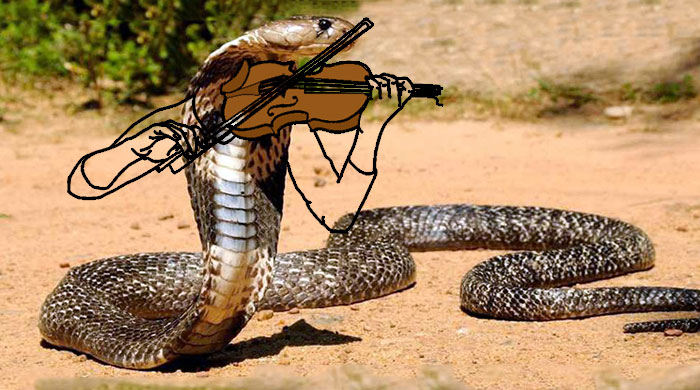